In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

In [3]:
def train_function(x):
    return np.sin(x)
    # return np.sin(x)


def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)

In [4]:
# define input sequence
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)
train_seq = train_function(xaxis)
n_steps = 20
X, y = split_sequence(train_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (3122, 20, 1)
y.shape = (3122,)


Train on 3122 samples
Epoch 1/20
3122/3122 [==============================] - 3s 822us/sample - loss: 0.2834

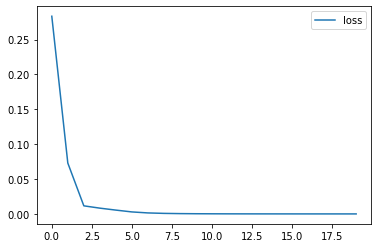

In [5]:
history = model.fit(X, y, epochs=20, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

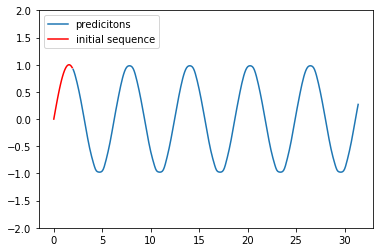

In [6]:
test_xaxis = np.arange(0, 10*np.pi, 0.1)
def test_function(x):
    return np.sin(x)
    # return np.cos(x)
calc_y = test_function(test_xaxis)
# start with initial n values, rest will be predicted
test_y = calc_y[:n_steps]
results = []
for i in range( len(test_xaxis) - n_steps ):
    net_input = test_y[i : i + n_steps]
    net_input = net_input.reshape((1, n_steps, n_features))
    y = model.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)
plt.plot(test_xaxis[n_steps:], test_y[n_steps:], label="predicitons")
# plt.plot(test_xaxis, calc_y, label="ground truth")
plt.plot(test_xaxis[:n_steps], test_y[:n_steps], label="initial sequence", color="red")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

315

In [7]:
model.save("../model/sine.h5")

In [8]:
model = keras.models.load_model("../model/spiked.h5")

In [15]:
print(model.predict([[[1.0]],[[2.0]]]))
print(model.predict([[[1.0]]]))

[[-0.0118715 ]
 [-0.07812168]]
[[-0.01187151]]


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  multiple                  480       
_________________________________________________________________
dense (Dense)                multiple                  11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


AttributeError: The layer has never been called and thus has no defined input shape.

In [101]:
a = np.array([[1.1]])
b = np.array([[2.2],[3.3]])
a = np.append(a, b)

In [110]:
np.append(a[1:],4.4)

array([2.2, 3.3, 4.4])

In [15]:
y

array([[0.67024153]], dtype=float32)

In [9]:
step_size = 0.05
n_steps = 20
max_x = 30
x_vals = np.arange(0,max_x,step_size)

init_hist_range = np.arange(-n_steps*step_size,0,step_size)
history = np.sin(init_hist_range)
history = np.random.rand(20)
init_history = np.array(history)

In [10]:
pred_y = np.array([])
for i in range(len(x_vals)):
    y = model.predict(history.reshape((1,n_steps,1)))
    history = np.append(history[1:],y)
    #history[-1] = y
    pred_y = np.append(pred_y, y)

In [70]:
len(x_vals[:-n_steps])
print(len(pred_y))

301


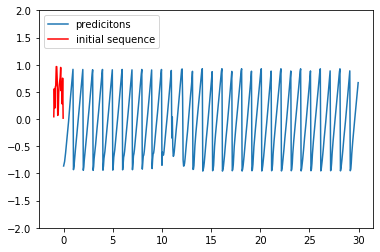

In [11]:
plt.plot(x_vals, pred_y, label="predicitons")
# plt.plot(test_xaxis, calc_y, label="ground truth")
plt.plot(init_hist_range, init_history, label="initial sequence", color="red")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

In [28]:
arr = np.array([1,2,3,4,5,6,7,8,9])

arr.reshape((1,9,1))

array([[[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]])